### 18/03/2021 Andrew Enrique Oliveira, Computer Science student at Universidade Federal de Itajubá

The main purpose of this notebook is, using the **scikit-learn** library, to explore the method of multiclass classification in logistic regression and the effects of adjustment in its hyperparameters. But it's also aimed to display graphs of the data classified using **matplotlib** and to draw insights and relations based on this graphs. The trained model was not used to predict the behaviour of another dataset - even though could be the case - because this is beyond the scope of this document.

In [175]:
# Libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import os

In [176]:
# Reading data
dev_df = pd.read_csv(f'.{os.sep}data{os.sep}dev_index.csv')

In [177]:
dev_df.head() # Literacy is a percentage

,Population,Area,Density,GDP,Literacy,Infant mortality,Development Index
0,9944201,1284000,7.7,1200,47.5,93.82,2
1,5450661,43094,126.5,31100,100.0,4.56,4
2,26783383,437072,61.3,1500,40.4,50.25,2
3,9439,102,92.5,3400,97.0,7.35,4
4,3431932,176220,19.5,12800,98.0,11.95,3


### Hypothesis
In order to classify this data into its possible categories (given by the column named Development Index), let's first try to reason upon how can one feature be related to another and ultimately how this relaton can weight in the determination of the category.

Let's formulate our first **hypothesis** as follows: It is reasonable to think that the Gross Domestic Product (GDP) has a relation with infant mortality, because GDP is a sinalization of the production of goods whitin a region and its economic activities. Therefore, **if we observe a low GDP its very likely that we will also observe a high rate of infant mortality**, the opposite holds true as well. 

In [219]:
# Let's first consider two features
x1 = dev_df['Infant mortality'].to_numpy()
x2 = dev_df['GDP'].to_numpy()

X = np.column_stack((x1, x2))
X[:2] # Two first rows of features

array([[9.382e+01, 1.200e+03],
       [4.560e+00, 3.110e+04]])

In [225]:
# Labels
y = np.array(dev_df['Development Index'])
y[:10] # Ten first values of labels

array([2, 4, 2, 4, 3, 3, 4, 4, 4, 2])

In [226]:
# Fit model
model_1 = LogisticRegression(multi_class='multinomial', max_iter=250).fit(X, y)

# Predictions
predictions_1 = model_1.predict(X)

Text(194.24318181818177, 0.5, 'GDP')

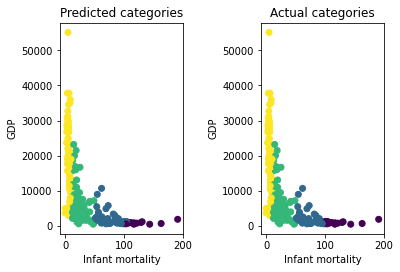

In [227]:
# Predicted categories vs Actual categories

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.scatter(X[:,0], X[:,1], c=predictions_1) # Predicted
ax2.scatter(X[:,0], X[:,1], c=y) # Actual 
fig.tight_layout(pad=3.0) # Space between plots
ax1.set_title('Predicted categories')
ax1.set_xlabel('Infant mortality')
ax1.set_ylabel('GDP')
ax2.set_title('Actual categories')
ax2.set_xlabel('Infant mortality')
ax2.set_ylabel('GDP')

In [206]:
# GDP mean of each category based on actual category

dev_df.groupby('Development Index')['GDP'].mean()

Development Index
1      961.538462
2     2180.769231
3     6626.966292
4    20752.112676
Name: GDP, dtype: float64

We can observe that regions with 100 to roughly 200 infant mortality, express a GDP mean of 961,53 (purple category). Regions with infant mortality in range of roughly 50 to 100, express a GDP mean of 2.180,76 (blue category). Furthermore, regions with roughly 10 to 50 infant mortality posses a GDP mean of 6.626,96 (green category). And regions with less than roughly 10 infant mortality shows the highest value of GDP mean: 20.752,11 (yellow category). These facts are very strong arguments for our **hyphotesis**.

Moreover, in relation to the predictions of the categories themselves, we observe that our predictions are highly accurate. This possibly indicates that those two features together has a great influence in the determination of the category of a particular region, but this affirmation demands further analysis.

### Another formulation
We can try to elaborate new relations between our features, draw insights about how this relation can categorize our data and relate this insights to previous conclusions. For instance, **it is reasonable to think that a region with high literacy might produce a high GDP**. In our previous hyphotesis, we encountered a scenario that expressed a inverse proportionality in relation to the quantity of our features (more GDP implied less infant mortality in a particular region), in this new scenario we have a direct proportionality, where more literacy implies more GDP. If we keep GDP as the y axis, our data will be dispersed reflected about the y axis in relation to the previous dispersion GDP x Infant mortality.

In [228]:
# Let's change the two features to see if it's possible to draw new conclusions
x1 = dev_df['Literacy'].to_numpy()
x2 = dev_df['GDP'].to_numpy()

X2 = np.column_stack((x1, x2))
X2[:2] # Two first rows of features

array([[   47.5,  1200. ],
       [  100. , 31100. ]])

In [209]:
# Predictions 
predictions_2 = model_1.predict(X2)

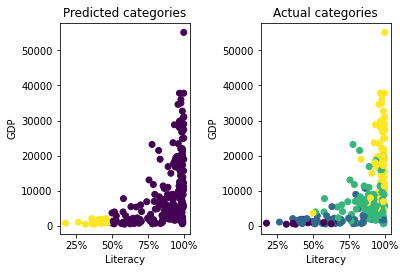

In [210]:
# Predicted categories vs Actual categories

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.scatter(X2[:,0], X2[:,1], c=predictions_2) # Predicted
ax2.scatter(X2[:,0], X2[:,1], c=y) # Actual
fig.tight_layout(pad=3.0) # Space between plots
ax1.set_title('Predicted categories')
ax1.set_xlabel('Literacy')
ax1.set_ylabel('GDP')
ax1.xaxis.set_major_formatter(mtick.PercentFormatter()) # x axis as percentage
ax2.set_title('Actual categories')
ax2.set_xlabel('Literacy')
ax2.set_ylabel('GDP')
ax2.xaxis.set_major_formatter(mtick.PercentFormatter()) # x axis as percentage

In [186]:
# GDP mean of each category based on actual category

dev_df.groupby('Development Index')['GDP'].mean()

Development Index
1      961.538462
2     2180.769231
3     6626.966292
4    20752.112676
Name: GDP, dtype: float64

Our dispersed data is in fact a reflection along the y axis of the shape of the previous data.

As seen before, the GDP mean is a good way to measure the performance of a group in relation to GDP in general. It is noticeable that regions with more than 90% of literacy express a GDP mean of 20.752,11, and those with 75% up to 90% have a GDP mean of 6.626,96. The blue and purple category are dispersed through 25% to 75%, but this doesn't invalidate our conclusion, because they still express a significant lower literacy in relation to the other two categories.

It is clearly visible that **model_1** is not a good model to categorize these two types of features. We can conclude that its scope is suitable exclusivily for a scenario of GDP x Infant mortality.

In [217]:
# Fit model
model_2 = LogisticRegression(multi_class='multinomial').fit(X2, y)

# Predictions
predictions_2 = model_2.predict(X2)

Text(194.24318181818177, 0.5, 'GDP')

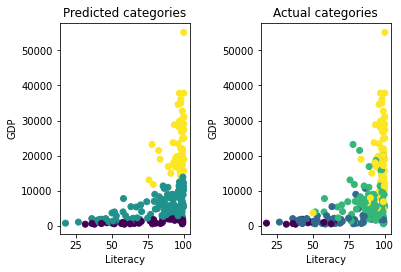

In [218]:
# Predicted categories vs Actual categories

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.scatter(X2[:,0], X2[:,1], c=predictions_2) # Predicted
ax2.scatter(X2[:,0], X2[:,1], c=y) # Actual
fig.tight_layout(pad=3.0) # Space between plots
ax1.set_title('Predicted categories')
ax1.set_xlabel('Literacy')
ax1.set_ylabel('GDP')
ax2.set_title('Actual categories')
ax2.set_xlabel('Literacy')
ax2.set_ylabel('GDP')

### Category weights 
Our model is considering a particular category (blue) too much, this phenomenon can be overcome if we tune how the algorithm weights each category.

The scikit-learn library's training algorithm "Logistic Regression" has a hyperparameter related to how categories are weighted (i.e, the higher a class is weighted, more emphasis it receives). This hyperparameter is called ```class_weight``` and we'll assign its value to ```balanced``` (i.e, adjust weights inversely proportional to class frequencies).

In [233]:
# New model with classes balanced
new_model_2 = LogisticRegression(multi_class='multinomial', class_weight='balanced', max_iter=150).fit(X2, y)

# New predictions
new_predictions_2 = new_model_2.predict(X2)

Text(194.24318181818177, 0.5, 'GDP')

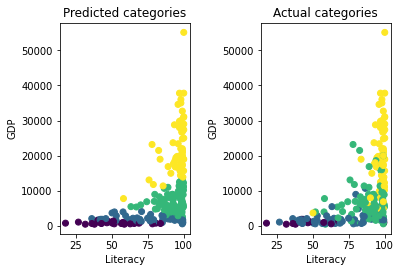

In [236]:
# Predicted categories vs Actual categories

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
ax1.scatter(X2[:,0], X2[:,1], c=new_predictions_2) # Predicted
ax2.scatter(X2[:,0], X2[:,1], c=y) # Actual
fig.tight_layout(pad=3.0) # Space between plots
ax1.set_title('Predicted categories')
ax1.set_xlabel('Literacy')
ax1.set_ylabel('GDP')
ax2.set_title('Actual categories')
ax2.set_xlabel('Literacy')
ax2.set_ylabel('GDP')

#### Comparing the two hyphotesis
Its posssible to infer that the yellow class represents the regions with highest development index, because in both cases analysed, it expressed the highest value of GDP mean, highest percentage of literacy and lowest value of infant mortality. Followed by the green, blue and purple categories respectively. 

We can conclude that these three factors are essential in the determination of the development index of a particular region, because they are tied together and the categories remains consistent with the regions in both predicted and actual categories as well as in the two analyzed hyphotesis. 

In [240]:
# Let's plot the three features together
x1 = dev_df['Infant mortality'].to_numpy()
x2 = dev_df['GDP'].to_numpy()
x3 = dev_df['Literacy'].to_numpy()

X = np.column_stack((x1, x2, x3))
X[:2] # Two first rows of features

array([[9.382e+01, 1.200e+03, 4.750e+01],
       [4.560e+00, 3.110e+04, 1.000e+02]])

In [247]:
model = LogisticRegression(multi_class='multinomial', max_iter=1600).fit(X, y)
predictions = model.predict(X)

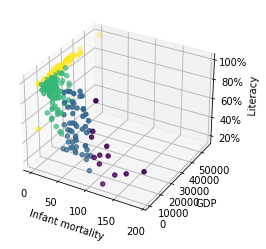

In [248]:
# Predicted values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=predictions)
ax.set_xlabel('Infant mortality')
ax.set_ylabel('GDP')
ax.set_zlabel('Literacy')
ax.zaxis.set_major_formatter(mtick.PercentFormatter()) # z axis as percentage

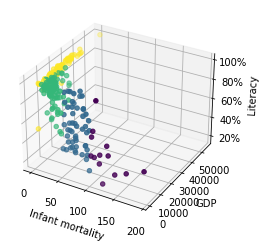

In [250]:
# Actual values
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)
ax.set_xlabel('Infant mortality')
ax.set_ylabel('GDP')
ax.set_zlabel('Literacy')
ax.zaxis.set_major_formatter(mtick.PercentFormatter()) # z axis as percentage

As expected, the yellow category (highest development index) is dispersed in the highest literacy percentage, highest GDP mean and lowest infant mortality.  